In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import calendar
import numpy as np
import pandas as pd
from joblib import load

from helper import *

In [3]:
showings = load('../data/showings_extra_feature.joblib')
showings.replace(np.inf, 0, inplace=True)
genres = load('../data/genres.joblib')

# Coverage by genre

In [4]:
genre = set()
all_genres = showings.tmdb_genre_ids.tolist()
for i in all_genres:
    genre.update(i)

In [5]:
%%time
stats = dict()
for i in genre:
    stats[genres[i]] = showings.loc[showings.tmdb_genre_ids.apply(lambda numbers: i in numbers), 'coverage']

Wall time: 3.52 s


### Average coverage by genre

In [6]:
for i, j in stats.items():
    print("{0:15} {1}".format(i, round(j.mean(), 4)))

War             0.2597
Adventure       0.2169
Fantasy         0.2156
Animation       0.2162
Drama           0.1954
TV Movie        0.2064
Horror          0.1817
Action          0.21
Music           0.22
Comedy          0.2062
History         0.2175
Western         0.1815
Mystery         0.1912
Thriller        0.1988
Crime           0.1902
Documentary     0.2065
Science Fiction 0.1862
Romance         0.2055
Family          0.2215


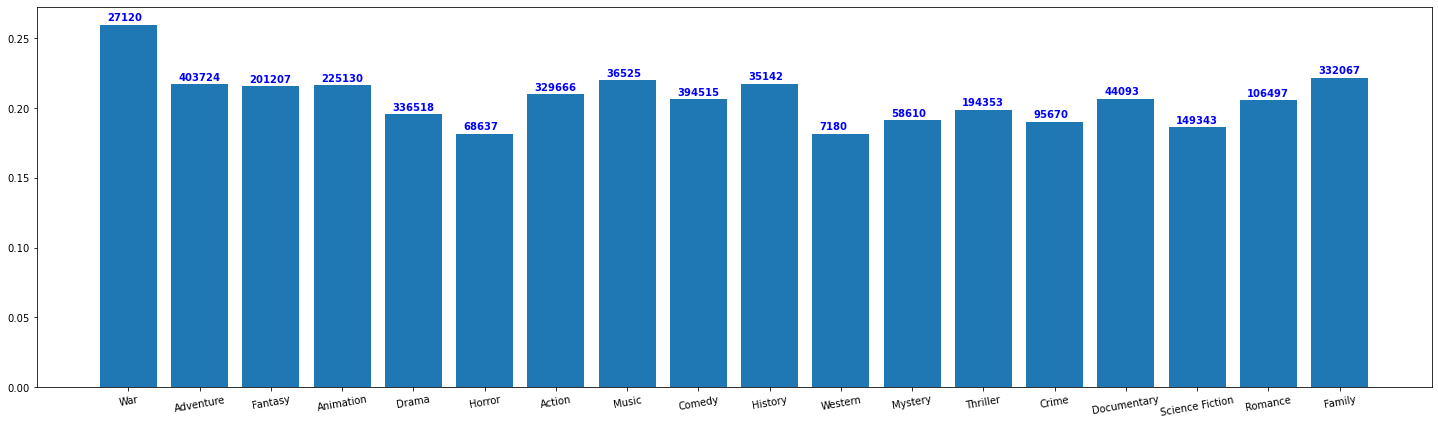

In [7]:
bar_plot(stats, file_name='genre', r=10, w=25, min_cnt=5000)

## Coverage by genre in the time period 12:00-22:59

In [8]:
stats_prime = dict()
for i in genre:
    stats_prime[genres[i]] = showings.loc[(showings.tmdb_genre_ids.apply(lambda numbers: i in numbers)) & (showings.hour > 11) & (showings.hour < 23), 'coverage']

In [9]:
for i, j in stats_prime.items():
    print("{0:15} {1}".format(i, round(j.mean(), 4)))

War             0.2571
Adventure       0.2149
Fantasy         0.2129
Animation       0.2134
Drama           0.1933
TV Movie        0.2022
Horror          0.18
Action          0.209
Music           0.2177
Comedy          0.2046
History         0.2153
Western         0.1812
Mystery         0.1904
Thriller        0.1981
Crime           0.1895
Documentary     0.202
Science Fiction 0.1858
Romance         0.2044
Family          0.2182


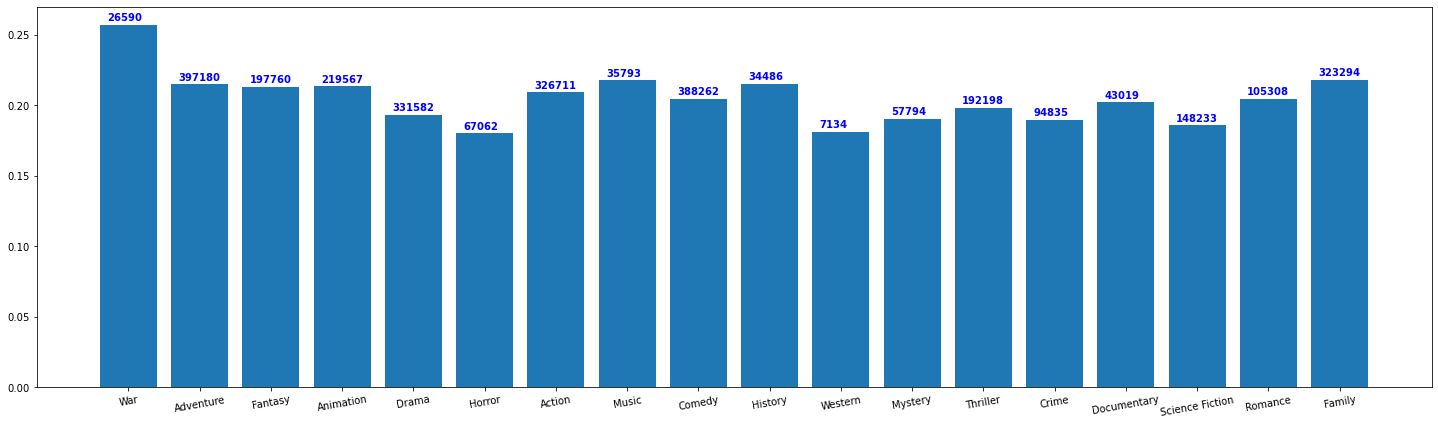

In [10]:
bar_plot(stats_prime, file_name='genre_prime', r=10, w=25, min_cnt=5000)

## Coverage by genre not in the time period 12:00-22:59

In [11]:
stats_outlier = dict()
for i in genre:
    stats_outlier[genres[i]] = showings.loc[(showings.tmdb_genre_ids.apply(lambda genres: i in genres)) & ((showings.hour < 12) | (showings.hour > 22)), 'coverage']

In [12]:
for i, j in stats_outlier.items():
    print("{0:15} {1}".format(i, round(j.mean(), 4)))

War             0.3921
Adventure       0.337
Fantasy         0.3734
Animation       0.3276
Drama           0.3411
TV Movie        0.3547
Horror          0.2506
Action          0.3153
Music           0.3351
Comedy          0.3104
History         0.3382
Western         0.2168
Mystery         0.2485
Thriller        0.2595
Crime           0.2671
Documentary     0.387
Science Fiction 0.2444
Romance         0.3042
Family          0.3447


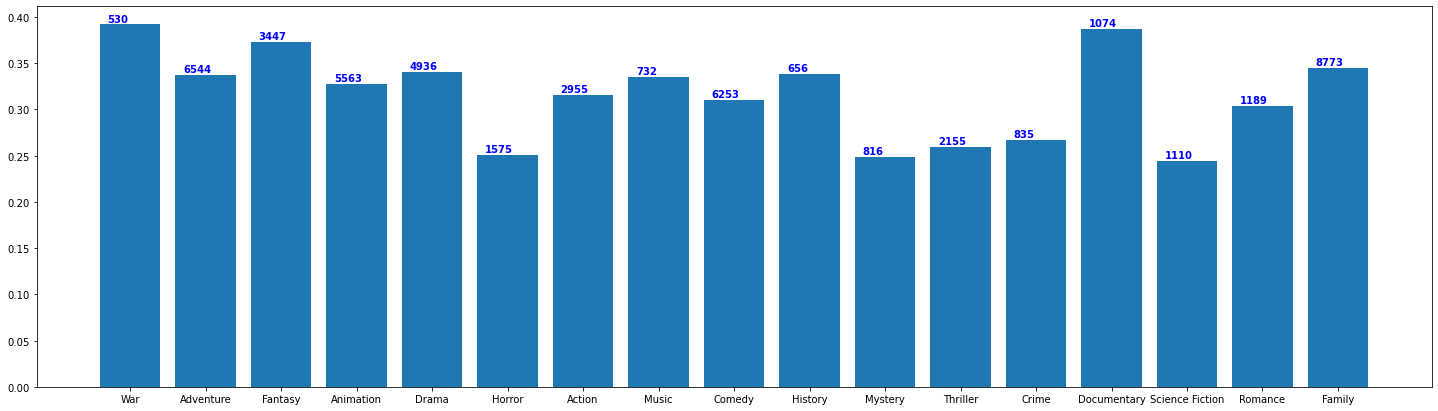

In [13]:
bar_plot(stats_outlier, file_name='genre_outlier', r=0, w=25, min_cnt=100)

# Comparison between the War and Family genres

In [14]:
stats_war    = dict()
stats_family = dict()
for i in range(9, 24):
    time = '0' + str(i) + ':00-0' + str(i) + ':59' if i<10 else str(i) + ':00-' + str(i) + ':59'
    stats_war[time]    = showings.loc[(showings.hour == i) & (showings.tmdb_genre_ids.apply(lambda genres: 10752 in genres)), 'coverage']
    stats_family[time] = showings.loc[(showings.hour == i) & (showings.tmdb_genre_ids.apply(lambda genres: 10751 in genres)), 'coverage']

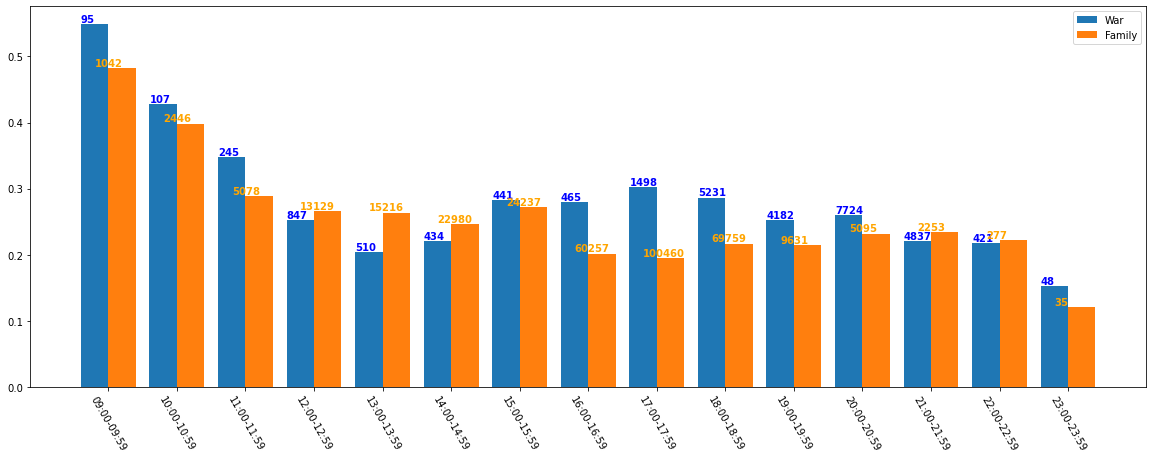

In [15]:
two_bar_plot(stats_war, stats_family, r=300, legend=('War', 'Family'), count=True, file_name='war_v_family')

In [16]:
stats_war    = dict()
stats_family = dict()
for i in range(7):
    stats_war[calendar.day_name[i]]    = showings.loc[(showings.dayofweek == i) & (showings.tmdb_genre_ids.apply(lambda genres: 10752 in genres)), 'coverage']
    stats_family[calendar.day_name[i]] = showings.loc[(showings.dayofweek == i) & (showings.tmdb_genre_ids.apply(lambda genres: 10751 in genres)), 'coverage']

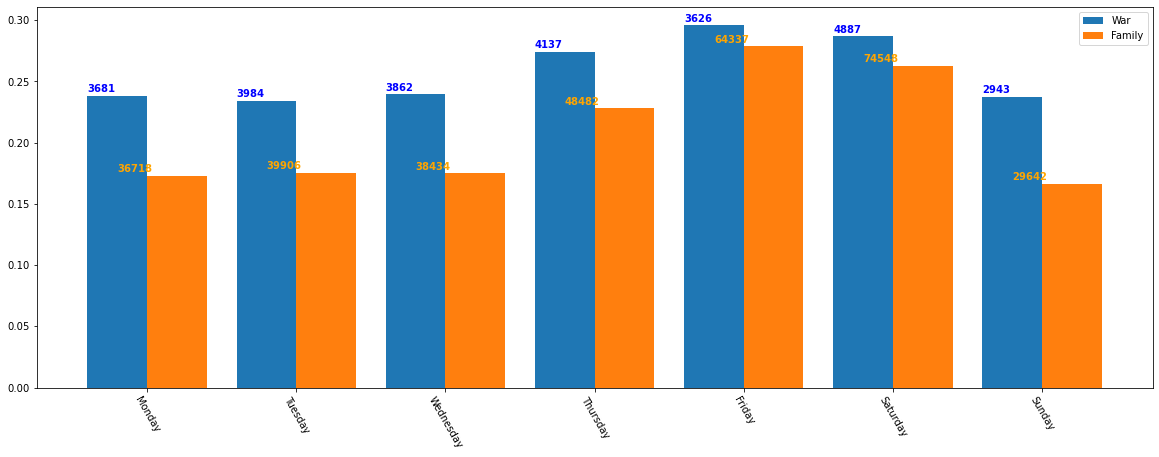

In [17]:
two_bar_plot(stats_war, stats_family, r=300, legend=('War', 'Family'), count=True, file_name='war_v_family_day')